In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
import os

# Search for your CSV file in Google Drive
for root, dirs, files in os.walk('/content/drive/MyDrive'):
    for name in files:
        if 'covid' in name.lower():  # Adjust if your file name is different
            print(os.path.join(root, name))


/content/drive/MyDrive/Colab Notebooks/covid_related_disease_data.csv


In [9]:
import pandas as pd

file_path = '/content/drive/MyDrive/Colab Notebooks/covid_related_disease_data.csv'
df = pd.read_csv(file_path)

# View first few rows
print(df.head())


   Patient_ID  Age  Gender       Region Preexisting_Condition  \
0           1   69    Male  Hovedstaden               Obesity   
1           2   38    Male     Sjælland                Asthma   
2           3   41  Female   Syddanmark          Hypertension   
3           4   81  Female  Hovedstaden                Asthma   
4           5   50  Female   Syddanmark        Cardiovascular   

  Date_of_Infection COVID_Strain Symptoms  Severity Hospitalized  ...  \
0        2022-06-21        Delta     Mild  Moderate          Yes  ...   
1        2024-02-02      XBB.1.5     Mild  Moderate           No  ...   
2        2023-05-28         Beta     Mild      High          Yes  ...   
3        2023-08-13        Delta   Severe      High           No  ...   
4        2023-03-10        Delta     Mild      High           No  ...   

  Reinfection Date_of_Reinfection Vaccination_Status Vaccine_Type  \
0          No                 NaN                Yes          NaN   
1          No                 Na

In [10]:
print("Missing values in each column:\n", df.isnull().sum())


Missing values in each column:
 Patient_ID                    0
Age                           0
Gender                        0
Region                        0
Preexisting_Condition       469
Date_of_Infection             0
COVID_Strain                  0
Symptoms                      0
Severity                      0
Hospitalized                  0
Hospital_Admission_Date    2124
Hospital_Discharge_Date    2124
ICU_Admission                 0
Ventilator_Support            0
Recovered                     0
Date_of_Recovery           1492
Reinfection                   0
Date_of_Reinfection        2715
Vaccination_Status            0
Vaccine_Type               1809
Doses_Received                0
Date_of_Last_Dose          1528
Long_COVID_Symptoms        2780
Occupation                    0
Smoking_Status                0
BMI                           0
dtype: int64


In [11]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               3000 non-null   int64  
 1   Age                      3000 non-null   int64  
 2   Gender                   3000 non-null   object 
 3   Region                   3000 non-null   object 
 4   Preexisting_Condition    2531 non-null   object 
 5   Date_of_Infection        3000 non-null   object 
 6   COVID_Strain             3000 non-null   object 
 7   Symptoms                 3000 non-null   object 
 8   Severity                 3000 non-null   object 
 9   Hospitalized             3000 non-null   object 
 10  Hospital_Admission_Date  876 non-null    object 
 11  Hospital_Discharge_Date  876 non-null    object 
 12  ICU_Admission            3000 non-null   object 
 13  Ventilator_Support       3000 non-null   object 
 14  Recovered               

In [12]:
print(df.describe())


        Patient_ID          Age  Doses_Received          BMI
count  3000.000000  3000.000000     3000.000000  3000.000000
mean   1500.500000    53.944000        0.981667    25.096500
std     866.169729    20.872919        1.154025     4.898435
min       1.000000    18.000000        0.000000    10.200000
25%     750.750000    36.000000        0.000000    21.800000
50%    1500.500000    54.000000        0.000000    25.100000
75%    2250.250000    72.000000        2.000000    28.500000
max    3000.000000    89.000000        3.000000    44.600000


In [13]:
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20', '21-40', '41-60', '61-80', '81+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

print(df[['Age', 'Age_Group']].head())


   Age Age_Group
0   69     61-80
1   38     21-40
2   41     41-60
3   81       81+
4   50     41-60


In [15]:
print(df.columns)


Index(['Patient_ID', 'Age', 'Gender', 'Region', 'Preexisting_Condition',
       'Date_of_Infection', 'COVID_Strain', 'Symptoms', 'Severity',
       'Hospitalized', 'Hospital_Admission_Date', 'Hospital_Discharge_Date',
       'ICU_Admission', 'Ventilator_Support', 'Recovered', 'Date_of_Recovery',
       'Reinfection', 'Date_of_Reinfection', 'Vaccination_Status',
       'Vaccine_Type', 'Doses_Received', 'Date_of_Last_Dose',
       'Long_COVID_Symptoms', 'Occupation', 'Smoking_Status', 'BMI',
       'Age_Group'],
      dtype='object')


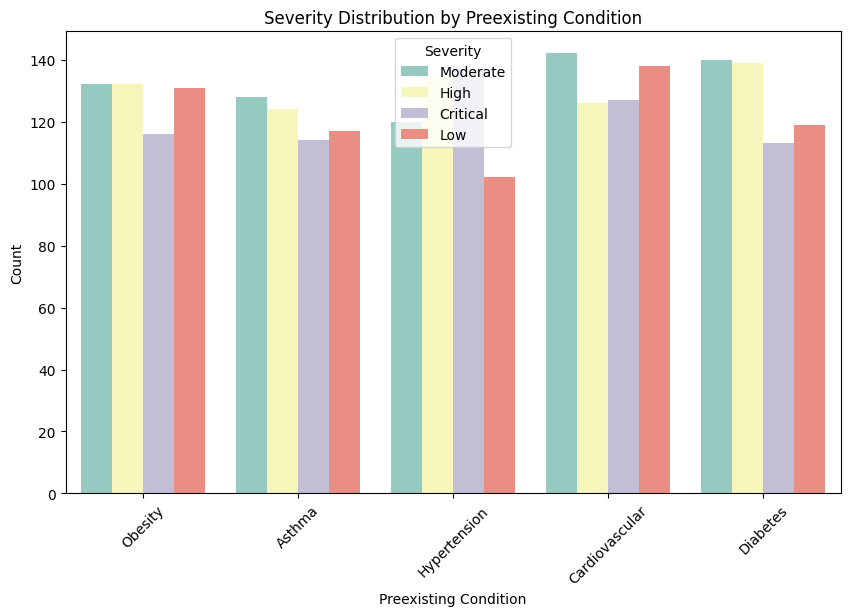

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Preexisting_Condition', hue='Severity', palette='Set3')
plt.title('Severity Distribution by Preexisting Condition')
plt.xlabel('Preexisting Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Severity')
plt.show()


<ipython-input-18-3448462137>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['Hospitalized'] == 'Yes'], x='Age_Group', palette='coolwarm')


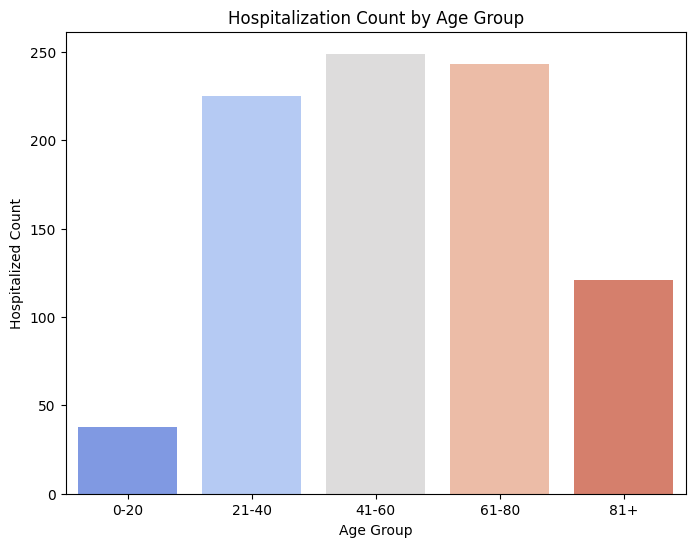

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df[df['Hospitalized'] == 'Yes'], x='Age_Group', palette='coolwarm')
plt.title('Hospitalization Count by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Hospitalized Count')
plt.show()
